## Week0-Assignment
뉴스 기사를 전처리하여 워드 클라우드 생성하기
1. 텍스트 정제
2. 토크나이징
3. 워드클라우드 생성

```
코드는 자유롭게 수정해도 좋습니다! 관심 있는 검색어로 검색한 기사에 대한 워드클라우드를 생성하시길 바랍니다.
```

In [28]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

!pip install soynlp
!pip install konlpy
!pip install wordcloud

### A. 한글 기사

In [29]:
import requests
from bs4 import BeautifulSoup
import re

In [30]:
def get_link(query):
    url = "https://search.naver.com/search.naver?"

    params = {
        # 탭
        "where": 'news',

        # 검색어
        "query": query,

        # 페이지
        "start": 0,
    }

    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'}, params=params)
    soup = BeautifulSoup(response.text, "html.parser")
  
    url_list = []

    for i in soup.select('div.info_group > a'):
        if re.search('news.naver.com', i['href']):
            url_list.append(i['href'])

    return url_list

def get_article(url_list):

    article_list = []

    for url in url_list:
        response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
        soup = BeautifulSoup(response.text, "html.parser")
        possible_ids = ['#articleBodyContents', '#articeBody', '#articleBody']
        for id in possible_ids:
          content = soup.select_one(id)
          if content:
            break
        article = content.text.strip()
        article_list.append(article)
    return article_list

In [31]:
query = input("검색어(한글)를 입력해주세요: ")
news_link = get_link(query)
print(news_link)
print()
news_article = get_article(news_link)
news_article

검색어(한글)를 입력해주세요: 아이유
['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=382&aid=0000896145', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=015&aid=0004511413', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=312&aid=0000473797', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=117&aid=0003472252', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=103&oid=005&aid=0001419688', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=468&aid=0000749872', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=241&aid=0003099342', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=477&aid=0000289346', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=106&oid=311&aid=0001274568', 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=105&oid=008&aid=0004556083']



['비주얼+퍼포먼스 시선 압도 \n가수 아이유가 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다.아이유의 소속사 EDAM엔터테인먼트는 12일 유튜브 채널을 통해 이달 25일 발표를 앞두고 있는 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다. 이번 티저 영상은 첫 장면부터 목에 핏줄이 다 드러난 채 핏기 없는 창백한 안색으로 마치 좀비를 연상케 하는 아이유의 모습이 담겨 있어 눈길을 끈다. 이내 눈을 감았다 뜬 아이유는 음악에 맞춰 숨이 가쁜 듯한 퍼포먼스를 선보였으며, 마지막에는 모든 것이 방전돼 지쳐 쓰러진 동작으로 마무리를 지어 짧지만 강렬한 임팩트를 안겼다.티저 영상과 함께 짧게 공개된 ‘Flu(플루)’는 세련된 비트와 트렌디한 사운드가 아이유의 독보적인 음색과 만나 또 다른 음악적 색채를 드러내고 있어 신곡에 대한 기대를 증폭시키고 있다.아이유는 앞서 정규 앨범 속 분위기를 엿볼 수 있는 콘셉트 티저와 수록곡 티저를 선보인데 이어 화려한 라인업의 아티스트들이 참여한 트랙 리스트를 공개해 많은 화제를 불러일으켰다. 또한, 매번 궁금증을 유발하는 다양한 형태의 티저를 공개해 컴백에 대한 팬들의 관심이 높아지고 있다.아이유는 오는 25일 정규 5집 음반을 정식 발표하고 본격적인 컴백 활동에 돌입한다. 동아닷컴 전효진 기자 jhj@donga.com▶ 연예현장 진짜 이야기  / 스타들의 아찔한 순간▶ 나의 아이돌을 픽♥ 해주세요. / 이번 주는 누가 1위?- Copyrights ⓒ 스포츠동아 무단 전재 및 재배포 금지 -',
 '// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}\n\n지난달 한국에 상륙한 세계 최대 음원 스트리밍 서비스 스포티파이에서 카카오엔터테인먼트(구 카카오M)가 보유한 아이유·임영웅 등의 음원을 들을 수 있게 된다. 한국을 제외한 해외 서비스에서 일시 중단됐던 카카오엔터의 음원 송출도 재개된다. 스포티파이의 한국 진출을 놓고 힘겨루기를 하던 두 회사가 전 세계 K팝

In [77]:
regex = '\.[\w|\s|\(|\)|\[|\]|=]*기자[\w|\s]*@'
count = 0
for n in news_article:
  print(count)
  temp = re.search(regex, n).span()[0]
  print(n[:temp])
  count += 1

0
비주얼+퍼포먼스 시선 압도 
가수 아이유가 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다.아이유의 소속사 EDAM엔터테인먼트는 12일 유튜브 채널을 통해 이달 25일 발표를 앞두고 있는 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다. 이번 티저 영상은 첫 장면부터 목에 핏줄이 다 드러난 채 핏기 없는 창백한 안색으로 마치 좀비를 연상케 하는 아이유의 모습이 담겨 있어 눈길을 끈다. 이내 눈을 감았다 뜬 아이유는 음악에 맞춰 숨이 가쁜 듯한 퍼포먼스를 선보였으며, 마지막에는 모든 것이 방전돼 지쳐 쓰러진 동작으로 마무리를 지어 짧지만 강렬한 임팩트를 안겼다.티저 영상과 함께 짧게 공개된 ‘Flu(플루)’는 세련된 비트와 트렌디한 사운드가 아이유의 독보적인 음색과 만나 또 다른 음악적 색채를 드러내고 있어 신곡에 대한 기대를 증폭시키고 있다.아이유는 앞서 정규 앨범 속 분위기를 엿볼 수 있는 콘셉트 티저와 수록곡 티저를 선보인데 이어 화려한 라인업의 아티스트들이 참여한 트랙 리스트를 공개해 많은 화제를 불러일으켰다. 또한, 매번 궁금증을 유발하는 다양한 형태의 티저를 공개해 컴백에 대한 팬들의 관심이 높아지고 있다.아이유는 오는 25일 정규 5집 음반을 정식 발표하고 본격적인 컴백 활동에 돌입한다
1
// flash 오류를 우회하기 위한 함수 추가
function _flash_removeCallback() {}

지난달 한국에 상륙한 세계 최대 음원 스트리밍 서비스 스포티파이에서 카카오엔터테인먼트(구 카카오M)가 보유한 아이유·임영웅 등의 음원을 들을 수 있게 된다. 한국을 제외한 해외 서비스에서 일시 중단됐던 카카오엔터의 음원 송출도 재개된다. 스포티파이의 한국 진출을 놓고 힘겨루기를 하던 두 회사가 전 세계 K팝 팬들의 원성에 떠밀려 합의를 도출한 모양새다.두 회사는 "원만하게 협상이 완료돼서 다행"이라는 취지의 메시지만 내놓을 뿐, 그간 음원 송출 중단 사태 등에 대해 자세한 언급은 극도로 꺼리고 있다. 계약 조건 등은 기밀이라는 이유에서다

AttributeError: ignored

In [79]:
# Q1. 한글 텍스트 정제
def preprocessing(text):
    regex = '^//.*\n.*}'
    text = re.sub(regex, '', text) # 맨 앞의 flash 어쩌구 있을 경우 제거
    regex = '\[[0-9a-zA-Z|\s|\w]*기자\]'
    text = re.sub(regex, '', text) # [~~~ 기자] 제거
    regex = '\.[\w|\s|\(|\)|\[|\]|=]*기자[\w|\s]*@'
    end_search = re.search(regex, n)
    if end_search:
      text = text[:end_search.span()[0]]
    
    return text

news_list_1 = []
for i in news_article:
    news_list_1.append(preprocessing(i))
news_list_1

['비주얼+퍼포먼스 시선 압도 \n가수 아이유가 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다.아이유의 소속사 EDAM엔터테인먼트는 12일 유튜브 채널을 통해 이달 25일 발표를 앞두고 있는 정규 5집 수록곡 ‘Flu(플루)’의 티저를 공개했다. 이번 티저 영상은 첫 장면부터 목에 핏줄이 다 드러난 채 핏기 없는 창백한 안색으로 마치 좀비를 연상케 하는 아이유의 모습이 담겨 있어 눈길을 끈다. 이내 눈을 감았다 뜬 아이유는 음악에 맞춰 숨이 가쁜 듯한 퍼포먼스를 선보였으며, 마지막에는 모든 것이 방전돼 지쳐 쓰러진 동작으로 마무리를 지어 짧지만 강렬한 임팩트를 안겼다.티저 영상과 함께 짧게 공개된 ‘Flu(플루)’는 세련된 비트와 트렌디한 사운드가 아이유의 독보적인 음색과 만나 또 다른 음악적 색채를 드러내고 있어 신곡에 대한 기대를 증폭시키고 있다.아이유는 앞서 정규 앨범 속 분위기를 엿볼 수 있는 콘셉트 티저와 수록곡 티저를 선보인데 이어 화려한 라인업의 아티스트들이 참여한 트랙 리스트를 공개해 많은 화제를 불러일으켰다. 또한, 매번 궁금증을 유발하는 다양한 형태의 티저를 공개해 컴백에 대한 팬들의 관심이 높아지고 있다.아이유는 오는 25일 정규 5집 음반을 정식 발표하고 본격적인 컴백 활동에 돌입한다. 동아닷컴 전효진 기자 jhj@donga.com▶ 연예현장 진짜 이야기  / 스타들의 아찔한 순간▶ 나의 아이돌을 픽♥ 해주세요. / 이번 주는 누가 1위?- Copyrights ⓒ 스포츠동아 무단 전재 및 재배포 금지 -',
 '\n\n지난달 한국에 상륙한 세계 최대 음원 스트리밍 서비스 스포티파이에서 카카오엔터테인먼트(구 카카오M)가 보유한 아이유·임영웅 등의 음원을 들을 수 있게 된다. 한국을 제외한 해외 서비스에서 일시 중단됐던 카카오엔터의 음원 송출도 재개된다. 스포티파이의 한국 진출을 놓고 힘겨루기를 하던 두 회사가 전 세계 K팝 팬들의 원성에 떠밀려 합의를 도출한 모양새다.두 회사는 "원만하게 협상이 완료돼서 다행"이라는 취지의 메시지만 

In [82]:
# Q2. 토큰화
from konlpy.tag import Okt  
okt=Okt()
news_list_2 = []
for news in news_list_1:
    news_list_2.append(okt.nouns(news))

In [83]:
stopwords = [""] # optional

In [84]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def displayWordCloud(data = None, backgroundcolor='white', width=800, height=400):
  wordcloud = WordCloud(
      font_path = fontpath,
      stopwords = stopwords,
      background_color = backgroundcolor,
      collocations = False,
      width = width, height = height).generate(data)
  plt.figure(figsize = (15,8))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()

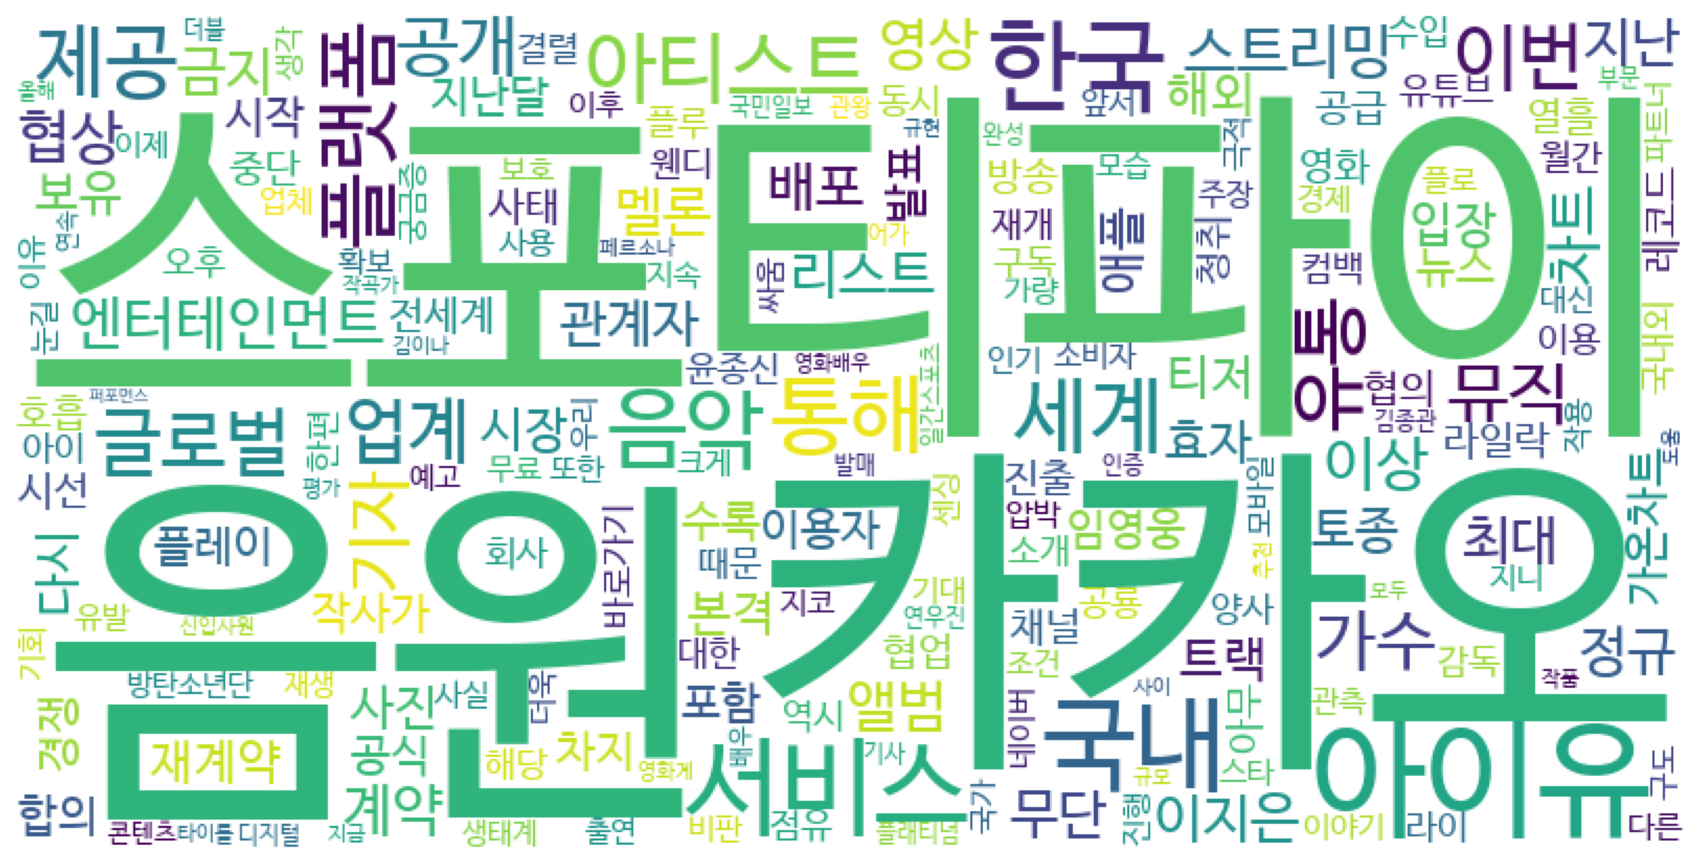

In [85]:
news_list_2 = sum(news_list_2, [])
displayWordCloud(' '.join(news_list_2))

### B. 영어 기사 

In [86]:
import requests
from bs4 import BeautifulSoup

In [87]:
def get_link(query):
    url = 'https://www.nytimes.com/search?dropmab=false&query={}&sort=best&types=article'.format(query)
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, "html.parser")
    plus_link = soup.select_one('div.css-e1lvw9 > a')['href']
    link = 'https://www.nytimes.com' + plus_link
    return link

def get_article(url):

    article_list = []
    response = requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})
    soup = BeautifulSoup(response.text, "html.parser")
    for i in soup.select('div.css-53u6y8 > p.css-axufdj'):
        article_list.append(i.text)

    return ' '.join(article_list)

In [89]:
query = input("검색어(영어)를 입력해주세요: ")
news_link = get_link(query)
print(news_link)
print()
news_article = get_article(news_link)
news_article

검색어(영어)를 입력해주세요: coupang
https://www.nytimes.com/2021/03/11/business/korea-coupang-ipo.html?searchResultPosition=1



'SEOUL, South Korea — The small white delivery trucks zip down streets all over South Korea. The uniformed workers send photos of safely delivered packages to impatient customers. Workers can move so fast, their employer promises, that it calls the service “rocket delivery.” The trucks and the operation belong to Coupang, a start-up founded by a Harvard Business School dropout that has shaken up shopping in South Korea, an industry long dominated by huge, button-down conglomerates. In a country where people are obsessed with “ppalli ppalli,” or getting things done quickly, Coupang has become a household name by offering “next-day” and even “same-day” and “dawn” delivery of groceries and millions of other items at no extra charge. The company, which is sometimes called the Amazon of South Korea, got a big endorsement on Thursday from Wall Street. Its shares rose 41 percent from an initial public offering price of $35 to close the day at $49.25. The I.P.O. raised $4.6 billion and valued 

In [90]:
# Q3. 영어 텍스트 정제
def preprocessing(text):
    text = re.sub(r'\u200b', '', text)
    return text
    
news_article = preprocessing(news_article)
news_article

'SEOUL, South Korea — The small white delivery trucks zip down streets all over South Korea. The uniformed workers send photos of safely delivered packages to impatient customers. Workers can move so fast, their employer promises, that it calls the service “rocket delivery.” The trucks and the operation belong to Coupang, a start-up founded by a Harvard Business School dropout that has shaken up shopping in South Korea, an industry long dominated by huge, button-down conglomerates. In a country where people are obsessed with “ppalli ppalli,” or getting things done quickly, Coupang has become a household name by offering “next-day” and even “same-day” and “dawn” delivery of groceries and millions of other items at no extra charge. The company, which is sometimes called the Amazon of South Korea, got a big endorsement on Thursday from Wall Street. Its shares rose 41 percent from an initial public offering price of $35 to close the day at $49.25. The I.P.O. raised $4.6 billion and valued 

In [95]:
# Q4. 토큰화
from tensorflow.keras.preprocessing.text import text_to_word_sequence
token_list_1 = text_to_word_sequence(news_article)

In [97]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords  
stopwords = stopwords.words('english')
stopwords[:10]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

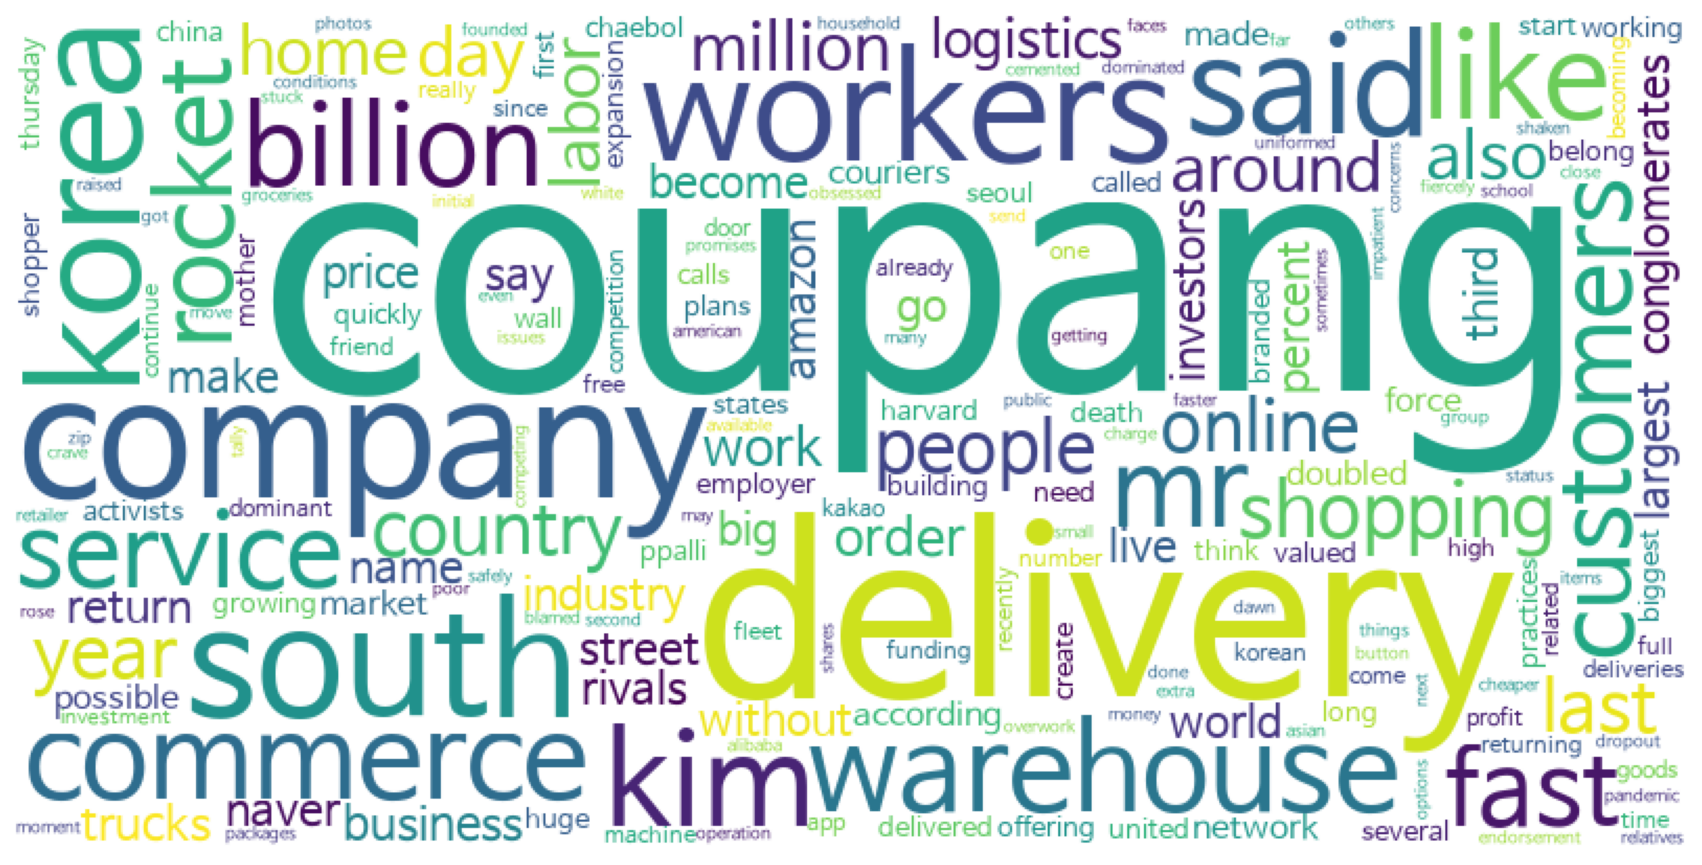

In [98]:
displayWordCloud(' '.join(token_list_1))